# 1.Starting with the environment
---

LIBRARIES:
*   Tensorflow (for neural networks)
*   OpenCV (for image processing)
*   SciKit-learn (for the ML related functions)

DATASET:
* GTSRB





In [ ]:
!pip install tensorflow opencv-python scikit-learn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/GTSRB-Training_fixed.zip -d gtsrb

Streaming output truncated to the last 5000 lines.
  inflating: gtsrb/GTSRB/Training/00030/00007_00024.ppm  
  inflating: gtsrb/GTSRB/Training/00030/00007_00025.ppm  
  inflating: gtsrb/GTSRB/Training/00030/00007_00026.ppm  
  inflating: gtsrb/GTSRB/Training/00030/00007_00027.ppm  
  inflating: gtsrb/GTSRB/Training/00030/00007_00028.ppm  
  inflating: gtsrb/GTSRB/Training/00030/00007_00029.ppm  
  inflating: gtsrb/GTSRB/Training/00030/00008_00000.ppm  
  inflating: gtsrb/GTSRB/Training/00030/00008_00001.ppm  
  inflating: gtsrb/GTSRB/Training/00030/00008_00002.ppm  
  inflating: gtsrb/GTSRB/Training/00030/00008_00003.ppm  
  inflating: gtsrb/GTSRB/Training/00030/00008_00004.ppm  
  inflating: gtsrb/GTSRB/Training/00030/00008_00005.ppm  
  inflating: gtsrb/GTSRB/Training/00030/00008_00006.ppm  
  inflating: gtsrb/GTSRB/Training/00030/00008_00007.ppm  
  inflating: gtsrb/GTSRB/Training/00030/00008_00008.ppm  
  inflating: gtsrb/GTSRB/Training/00030/00008_00009.ppm  
  inflating: gtsrb/GT

# 2.Preprocessing


---



* Resize images to 30x30
* Assign numbers for every folder name




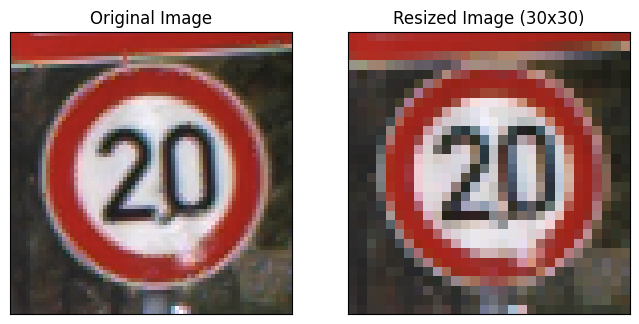

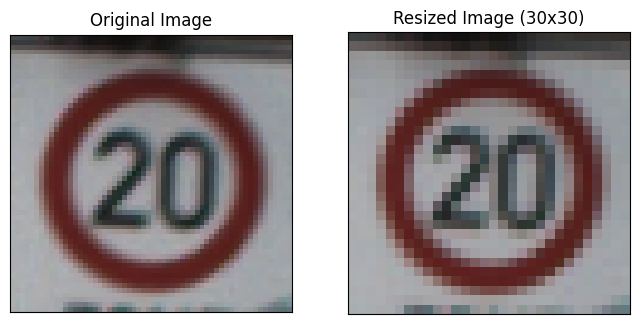

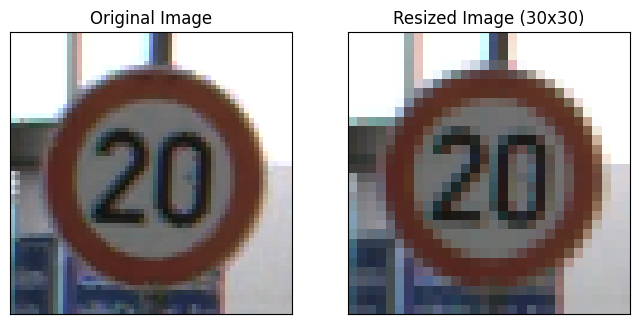

Total images loaded: 26640
Total labels loaded: 26640


In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

data_dir = "/content/gtsrb/GTSRB/Training"
categories = [str(i).zfill(5) for i in range(43)]
X, y = [], []
samples_shown = 0

for category in categories:
    path = os.path.join(data_dir, category)
    if not os.path.exists(path):
        continue

    for img_name in os.listdir(path):
        if not img_name.endswith(".ppm"):
            continue

        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Failed to load: {img_path}")
            continue


        resized_img = cv2.resize(img, (30, 30))


        if samples_shown < 3:
            plt.figure(figsize=(8,4))
            plt.subplot(1,2,1)
            plt.xticks([])
            plt.yticks([])
            plt.title("Original Image")
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

            plt.subplot(1,2,2)
            plt.xticks([])
            plt.yticks([])
            plt.title("Resized Image (30x30)")
            plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))

            plt.show()

            samples_shown += 1


        X.append(resized_img)
        y.append(int(category))

X = np.array(X) / 255.0
y = np.array(y)

print(f"Total images loaded: {len(X)}")
print(f"Total labels loaded: {len(y)}")

* Split dataset into training and testing datasets

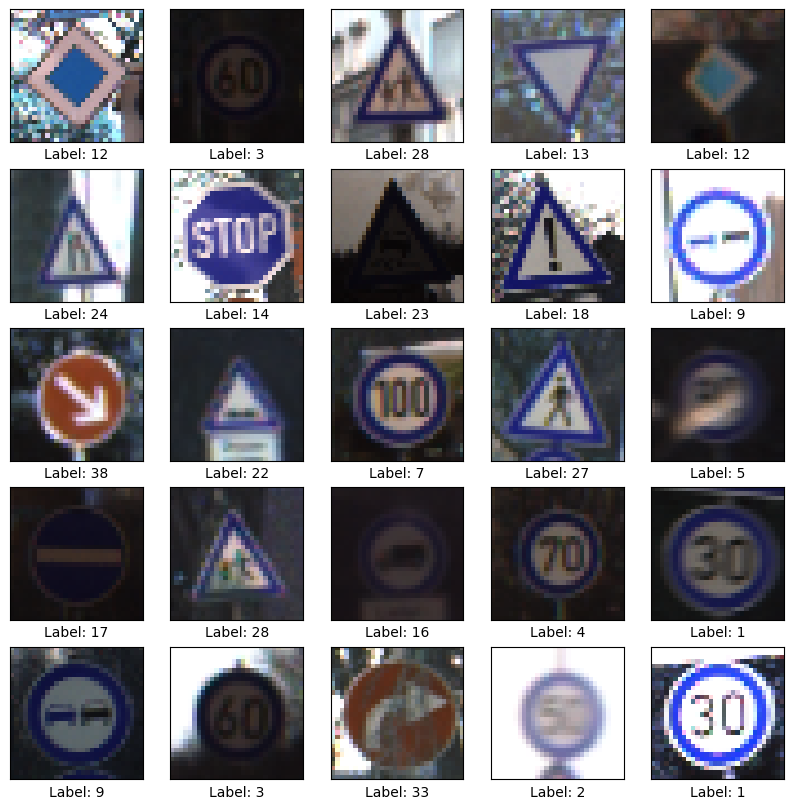

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(f"Label: {y_train[i]}")

plt.show()

#3.Training
---
* Train the CNN with the training data
* Plot the learning curve

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.2553 - loss: 2.8249 - val_accuracy: 0.7810 - val_loss: 0.7882
Epoch 2/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 44s 48ms/step - accuracy: 0.6941 - loss: 0.9598 - val_accuracy: 0.9330 - val_loss: 0.2899
Epoch 3/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 36s 41ms/step - accuracy: 0.8205 - loss: 0.5586 - val_accuracy: 0.9617 - val_loss: 0.1734
Epoch 4/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.8707 - loss: 0.3952 - val_accuracy: 0.9730 - val_loss: 0.1240
Epoch 5/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.8992 - loss: 0.3089 - val_accuracy: 0.9754 - val_loss: 0.1157
Epoch 6/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.9148 - loss: 0.2570 - val_accuracy: 0.9854 - val_loss: 0.0716
Epoch 7/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.9285 - loss: 0.2135 - val_accuracy: 0.9831 - val_loss: 0.0688
Epoch 8/10
666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.9374 - loss: 0.1873 - 

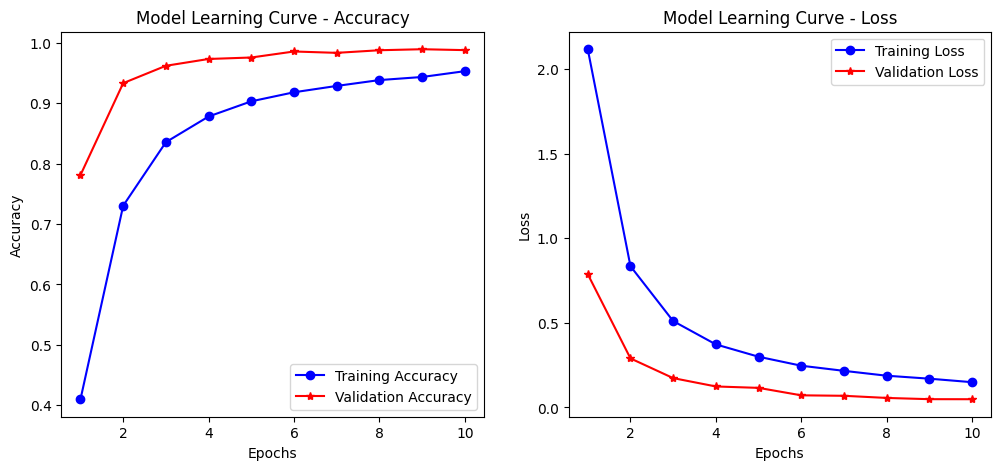

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(30, 30, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(43, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

epochs = range(1, 11)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, train_acc, 'bo-', label="Training Accuracy")
plt.plot(epochs, val_acc, 'r*-', label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Learning Curve - Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'bo-', label="Training Loss")
plt.plot(epochs, val_loss, 'r*-', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Learning Curve - Loss")

plt.show()

#4.Testing
---
* Test the CNN with the testing data
* Output Confusion Matrix
* Output an Accuracy score(percentage)

167/167 - 4s - 22ms/step - accuracy: 0.9876 - loss: 0.0485
Test Accuracy: 0.9876
Test Loss: 0.0485
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


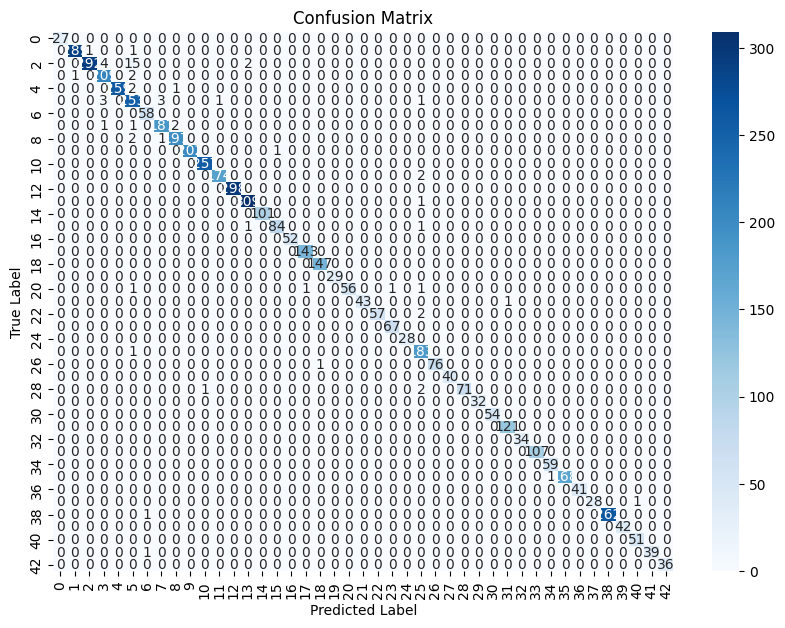

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#5.Findings

After training the model with

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 959,939 (3.66 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 639,960 (2.44 MB)